In [1]:
import itertools
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import NullFormatter
import pandas as pd
import numpy as np
import matplotlib.ticker as ticker
from sklearn import preprocessing
import seaborn as sns
%matplotlib inline

In [2]:
data = pd.read_csv('https://s3.us.cloud-object-storage.appdomain.cloud/cf-courses-data/CognitiveClass/DP0701EN/version-2/Data-Collisions.csv')

C:\Users\Bryan\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3071: DtypeWarning: Columns (33) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 194673 entries, 0 to 194672
Data columns (total 38 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   SEVERITYCODE    194673 non-null  int64  
 1   X               189339 non-null  float64
 2   Y               189339 non-null  float64
 3   OBJECTID        194673 non-null  int64  
 4   INCKEY          194673 non-null  int64  
 5   COLDETKEY       194673 non-null  int64  
 6   REPORTNO        194673 non-null  object 
 7   STATUS          194673 non-null  object 
 8   ADDRTYPE        192747 non-null  object 
 9   INTKEY          65070 non-null   float64
 10  LOCATION        191996 non-null  object 
 11  EXCEPTRSNCODE   84811 non-null   object 
 12  EXCEPTRSNDESC   5638 non-null    object 
 13  SEVERITYCODE.1  194673 non-null  int64  
 14  SEVERITYDESC    194673 non-null  object 
 15  COLLISIONTYPE   189769 non-null  object 
 16  PERSONCOUNT     194673 non-null  int64  
 17  PEDCOUNT  

In [4]:
data.head()

,SEVERITYCODE,X,Y,OBJECTID,INCKEY,COLDETKEY,REPORTNO,STATUS,ADDRTYPE,INTKEY,...,ROADCOND,LIGHTCOND,PEDROWNOTGRNT,SDOTCOLNUM,SPEEDING,ST_COLCODE,ST_COLDESC,SEGLANEKEY,CROSSWALKKEY,HITPARKEDCAR
0,2,-122.323148,47.703140,1,1307,1307,3502005,Matched,Intersection,37475.0,...,Wet,Daylight,NaN,NaN,NaN,10,Entering at angle,0,0,N
1,1,-122.347294,47.647172,2,52200,52200,2607959,Matched,Block,NaN,...,Wet,Dark - Street Lights On,NaN,6354039.0,NaN,11,From same direction - both going straight - bo...,0,0,N
2,1,-122.334540,47.607871,3,26700,26700,1482393,Matched,Block,NaN,...,Dry,Daylight,NaN,4323031.0,NaN,32,One parked--one moving,0,0,N
3,1,-122.334803,47.604803,4,1144,1144,3503937,Matched,Block,NaN,...,Dry,Daylight,NaN,NaN,NaN,23,From same direction - all others,0,0,N
4,2,-122.306426,47.545739,5,17700,17700,1807429,Matched,Intersection,34387.0,...,Wet,Daylight,NaN,4028032.0,NaN,10,Entering at angle,0,0,N


In [5]:
data.isna().sum()

SEVERITYCODE           0
X                   5334
Y                   5334
OBJECTID               0
INCKEY                 0
COLDETKEY              0
REPORTNO               0
STATUS                 0
ADDRTYPE            1926
INTKEY            129603
LOCATION            2677
EXCEPTRSNCODE     109862
EXCEPTRSNDESC     189035
SEVERITYCODE.1         0
SEVERITYDESC           0
COLLISIONTYPE       4904
PERSONCOUNT            0
PEDCOUNT               0
PEDCYLCOUNT            0
VEHCOUNT               0
INCDATE                0
INCDTTM                0
JUNCTIONTYPE        6329
SDOT_COLCODE           0
SDOT_COLDESC           0
INATTENTIONIND    164868
UNDERINFL           4884
WEATHER             5081
ROADCOND            5012
LIGHTCOND           5170
PEDROWNOTGRNT     190006
SDOTCOLNUM         79737
SPEEDING          185340
ST_COLCODE            18
ST_COLDESC          4904
SEGLANEKEY             0
CROSSWALKKEY           0
HITPARKEDCAR           0
dtype: int64

In [6]:
data.duplicated().sum()

0

In [7]:
data['ADDRTYPE'].value_counts()

Block           126926
Intersection     65070
Alley              751
Name: ADDRTYPE, dtype: int64

In [8]:
data['JUNCTIONTYPE'].value_counts()

Mid-Block (not related to intersection)              89800
At Intersection (intersection related)               62810
Mid-Block (but intersection related)                 22790
Driveway Junction                                    10671
At Intersection (but not related to intersection)     2098
Ramp Junction                                          166
Unknown                                                  9
Name: JUNCTIONTYPE, dtype: int64

In [9]:
data['PERSONCOUNT'].value_counts()

2     114231
3      35553
4      14660
1      13154
5       6584
0       5544
6       2702
7       1131
8        533
9        216
10       128
11        56
12        33
13        21
14        19
15        11
17        11
16         8
44         6
18         6
20         6
25         6
19         5
26         4
22         4
27         3
28         3
29         3
47         3
32         3
34         3
37         3
23         2
21         2
24         2
30         2
36         2
57         1
31         1
35         1
39         1
41         1
43         1
48         1
53         1
54         1
81         1
Name: PERSONCOUNT, dtype: int64

In [10]:
data[['SDOT_COLCODE','ST_COLCODE']]

,SDOT_COLCODE,ST_COLCODE
0,11,10
1,16,11
2,14,32
3,11,23
4,11,10
...,...,...
194668,11,24
194669,14,13
194670,11,28
194671,51,5


In [11]:
data['ST_COLCODE'].value_counts()

32    27612
10    23427
14    16883
32    16809
10    11247
      ...  
54        1
87        1
43        1
60        1
87        1
Name: ST_COLCODE, Length: 115, dtype: int64

In [12]:
data_clean = data[['JUNCTIONTYPE', 'WEATHER', 'ROADCOND', 'LIGHTCOND','INATTENTIONIND', 'UNDERINFL', 'SPEEDING', 'SEVERITYCODE']]

In [13]:
data_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 194673 entries, 0 to 194672
Data columns (total 8 columns):
 #   Column          Non-Null Count   Dtype 
---  ------          --------------   ----- 
 0   JUNCTIONTYPE    188344 non-null  object
 1   WEATHER         189592 non-null  object
 2   ROADCOND        189661 non-null  object
 3   LIGHTCOND       189503 non-null  object
 4   INATTENTIONIND  29805 non-null   object
 5   UNDERINFL       189789 non-null  object
 6   SPEEDING        9333 non-null    object
 7   SEVERITYCODE    194673 non-null  int64 
dtypes: int64(1), object(7)
memory usage: 11.9+ MB


In [14]:
data_clean['SPEEDING'].value_counts()

Y    9333
Name: SPEEDING, dtype: int64

In [15]:
data_clean['SPEEDING']=data_clean['SPEEDING'].map({'Y':1})
data_clean['SPEEDING'].replace(np.nan, 0, inplace = True)
data_clean['SPEEDING'].value_counts()

<ipython-input-15-c12c81e95bb8>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_clean['SPEEDING']=data_clean['SPEEDING'].map({'Y':1})
C:\Users\Bryan\anaconda3\lib\site-packages\pandas\core\generic.py:6746: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._update_inplace(new_data)


0.0    185340
1.0      9333
Name: SPEEDING, dtype: int64

In [16]:
data_clean['UNDERINFL'].value_counts()

N    100274
0     80394
Y      5126
1      3995
Name: UNDERINFL, dtype: int64

In [17]:
data_clean['UNDERINFL']=data_clean['UNDERINFL'].map({'Y':1, 'N':0})
data_clean['UNDERINFL'].replace(np.nan, 0, inplace = True)
data_clean['UNDERINFL'].value_counts()

<ipython-input-17-9405e5d6e6ff>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_clean['UNDERINFL']=data_clean['UNDERINFL'].map({'Y':1, 'N':0})


0.0    189547
1.0      5126
Name: UNDERINFL, dtype: int64

In [18]:
data_clean['INATTENTIONIND'].value_counts()

Y    29805
Name: INATTENTIONIND, dtype: int64

In [19]:
data_clean['INATTENTIONIND']=data_clean['INATTENTIONIND'].map({'Y':1})
data_clean['INATTENTIONIND'].replace(np.nan, 0, inplace = True)
data_clean['INATTENTIONIND'].value_counts()

<ipython-input-19-14ddd16ec178>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_clean['INATTENTIONIND']=data_clean['INATTENTIONIND'].map({'Y':1})


0.0    164868
1.0     29805
Name: INATTENTIONIND, dtype: int64

In [20]:
data_clean['JUNCTIONTYPE'].value_counts()

Mid-Block (not related to intersection)              89800
At Intersection (intersection related)               62810
Mid-Block (but intersection related)                 22790
Driveway Junction                                    10671
At Intersection (but not related to intersection)     2098
Ramp Junction                                          166
Unknown                                                  9
Name: JUNCTIONTYPE, dtype: int64

In [21]:
data_clean.replace('Unknown', np.nan, inplace=True)
data_clean.replace('Other', np.nan, inplace=True)
data_clean['SEVERITYCODE'].replace('0', np.nan, inplace=True)

C:\Users\Bryan\anaconda3\lib\site-packages\pandas\core\frame.py:4166: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().replace(


In [22]:
data_clean.dropna(axis = 0, inplace = True)

<ipython-input-22-147817109993>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_clean.dropna(axis = 0, inplace = True)


In [23]:
data_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 167474 entries, 0 to 194672
Data columns (total 8 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   JUNCTIONTYPE    167474 non-null  object 
 1   WEATHER         167474 non-null  object 
 2   ROADCOND        167474 non-null  object 
 3   LIGHTCOND       167474 non-null  object 
 4   INATTENTIONIND  167474 non-null  float64
 5   UNDERINFL       167474 non-null  float64
 6   SPEEDING        167474 non-null  float64
 7   SEVERITYCODE    167474 non-null  int64  
dtypes: float64(3), int64(1), object(4)
memory usage: 11.5+ MB


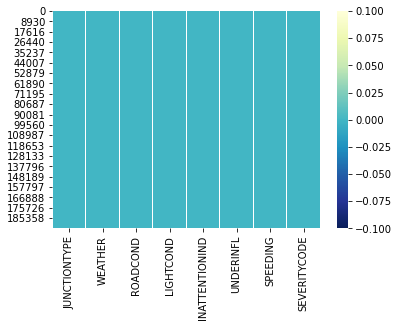

In [24]:
sns.heatmap(data_clean.isnull(), cmap='YlGnBu_r')
plt.show()

In [25]:
data_clean.isnull().sum()

JUNCTIONTYPE      0
WEATHER           0
ROADCOND          0
LIGHTCOND         0
INATTENTIONIND    0
UNDERINFL         0
SPEEDING          0
SEVERITYCODE      0
dtype: int64

In [26]:
%matplotlib inline 

import matplotlib as mpl
import matplotlib.pyplot as plt

mpl.style.use('ggplot')

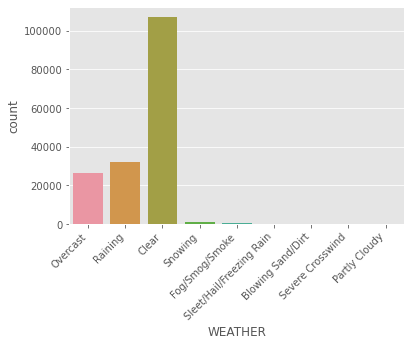

In [27]:
ax = sns.countplot(data_clean['WEATHER'])
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, 
                   horizontalalignment='right')
plt.show()

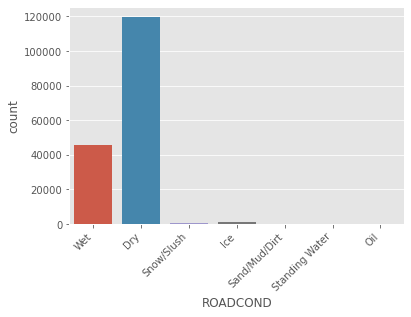

In [28]:
ax = sns.countplot(data_clean['ROADCOND'])
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, 
                   horizontalalignment='right')
plt.show()

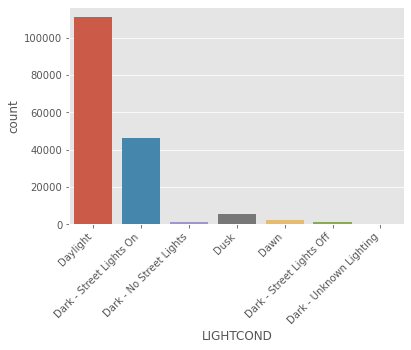

In [29]:
ax = sns.countplot(data_clean['LIGHTCOND'])
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, 
                   horizontalalignment='right')
plt.show()

In [30]:
data_clean.corr()

,INATTENTIONIND,UNDERINFL,SPEEDING,SEVERITYCODE
INATTENTIONIND,1.000000,-0.020962,-0.059861,0.028432
UNDERINFL,-0.020962,1.000000,0.047797,0.018421
SPEEDING,-0.059861,0.047797,1.000000,0.026073
SEVERITYCODE,0.028432,0.018421,0.026073,1.000000


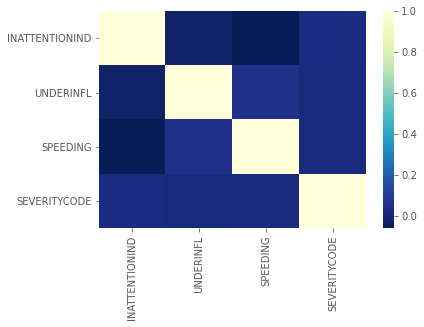

In [31]:
sns.heatmap(data_clean.corr(), cmap = 'YlGnBu_r')
plt.show()

In [32]:
data_clean = pd.concat([data_clean.drop(['WEATHER', 'ROADCOND', 'LIGHTCOND','JUNCTIONTYPE'], axis = 1),
                      pd.get_dummies(data_clean['WEATHER']),
                      pd.get_dummies(data_clean['ROADCOND']),
                      pd.get_dummies(data_clean['LIGHTCOND']),
                      pd.get_dummies(data_clean['JUNCTIONTYPE'])],axis = 1)
data_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 167474 entries, 0 to 194672
Data columns (total 33 columns):
 #   Column                                             Non-Null Count   Dtype  
---  ------                                             --------------   -----  
 0   INATTENTIONIND                                     167474 non-null  float64
 1   UNDERINFL                                          167474 non-null  float64
 2   SPEEDING                                           167474 non-null  float64
 3   SEVERITYCODE                                       167474 non-null  int64  
 4   Blowing Sand/Dirt                                  167474 non-null  uint8  
 5   Clear                                              167474 non-null  uint8  
 6   Fog/Smog/Smoke                                     167474 non-null  uint8  
 7   Overcast                                           167474 non-null  uint8  
 8   Partly Cloudy                                      167474 non-null  uint8 

In [33]:
data_clean = data_clean.sample(frac=1).reset_index(drop=True)

In [34]:
data_clean.head(5).T

,0,1,2,3,4
INATTENTIONIND,0.0,0.0,0.0,0.0,0.0
UNDERINFL,0.0,0.0,0.0,0.0,0.0
SPEEDING,1.0,0.0,0.0,0.0,0.0
SEVERITYCODE,2.0,2.0,2.0,1.0,1.0
Blowing Sand/Dirt,0.0,0.0,0.0,0.0,0.0
Clear,1.0,0.0,1.0,0.0,0.0
Fog/Smog/Smoke,0.0,0.0,0.0,0.0,0.0
Overcast,0.0,0.0,0.0,1.0,1.0
Partly Cloudy,0.0,0.0,0.0,0.0,0.0
Raining,0.0,1.0,0.0,0.0,0.0


In [35]:
data_clean.corr()

,INATTENTIONIND,UNDERINFL,SPEEDING,SEVERITYCODE,Blowing Sand/Dirt,Clear,Fog/Smog/Smoke,Overcast,Partly Cloudy,Raining,...,Dark - Unknown Lighting,Dawn,Daylight,Dusk,At Intersection (but not related to intersection),At Intersection (intersection related),Driveway Junction,Mid-Block (but intersection related),Mid-Block (not related to intersection),Ramp Junction
INATTENTIONIND,1.000000,-0.020962,-0.059861,0.028432,-0.003113,0.026916,0.002656,-0.000896,-0.002463,-0.028193,...,-0.003116,-0.000890,0.064022,-0.009370,0.017869,-0.103795,-0.016106,0.076339,0.052241,0.009341
UNDERINFL,-0.020962,1.000000,0.047797,0.018421,-0.000544,-0.005720,0.007404,-0.001031,-0.000955,0.007418,...,-0.001208,-0.007832,-0.166361,-0.000156,0.012289,-0.039434,-0.028731,-0.017058,0.060351,0.001630
SPEEDING,-0.059861,0.047797,1.000000,0.026073,0.001250,-0.095864,0.008364,0.006640,-0.001301,0.099019,...,-0.001646,0.012280,-0.087447,-0.004935,0.005891,-0.076560,-0.032161,0.042187,0.059237,0.004955
SEVERITYCODE,0.028432,0.018421,0.026073,1.000000,-0.001508,-0.001221,0.000865,-0.006717,0.003131,0.011324,...,0.000654,0.001832,0.031046,0.003525,0.000832,0.174078,-0.008615,-0.000969,-0.162893,-0.000095
Blowing Sand/Dirt,-0.003113,-0.000544,0.001250,-0.001508,1.000000,-0.021120,-0.000902,-0.006870,-0.000087,-0.007732,...,-0.000109,0.001293,-0.003069,0.001274,-0.001647,-0.003858,-0.002386,0.001922,0.003933,-0.000482
Clear,0.026916,-0.005720,-0.095864,-0.001221,-0.021120,1.000000,-0.075984,-0.578391,-0.007286,-0.650987,...,-0.003817,-0.054662,0.147816,-0.027701,0.004476,-0.012610,0.002394,-0.011331,0.017918,-0.004586
Fog/Smog/Smoke,0.002656,0.007404,0.008364,0.000865,-0.000902,-0.075984,1.000000,-0.024715,-0.000311,-0.027817,...,-0.000394,0.024310,-0.035890,-0.007041,-0.000817,-0.003783,-0.000983,0.000164,0.003426,0.012095
Overcast,-0.000896,-0.001031,0.006640,-0.006717,-0.006870,-0.578391,-0.024715,1.000000,-0.002370,-0.211743,...,-0.000631,0.036185,-0.017729,0.019745,-0.003934,-0.000764,0.011556,0.004554,-0.007134,0.002397
Partly Cloudy,-0.002463,-0.000955,-0.001301,0.003131,-0.000087,-0.007286,-0.000311,-0.002370,1.000000,-0.002667,...,-0.000038,0.008593,-0.003041,-0.001013,-0.000568,0.002802,-0.001373,-0.002078,-0.000527,-0.000166
Raining,-0.028193,0.007418,0.099019,0.011324,-0.007732,-0.650987,-0.027817,-0.211743,-0.002667,1.000000,...,0.005392,0.026469,-0.150230,0.016954,-0.002043,0.019838,-0.011627,0.008829,-0.019160,0.002077


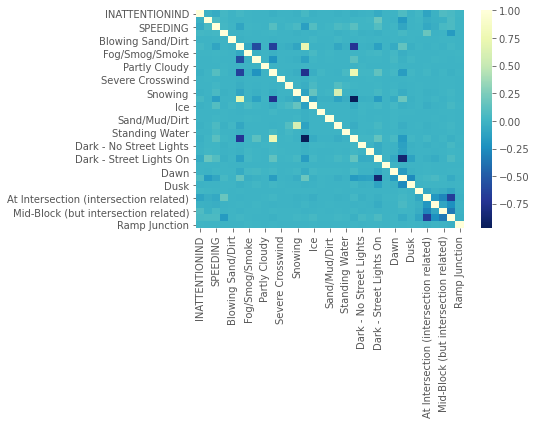

In [36]:
sns.heatmap(data_clean.corr(), cmap='YlGnBu_r')
plt.show()

In [37]:
data_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167474 entries, 0 to 167473
Data columns (total 33 columns):
 #   Column                                             Non-Null Count   Dtype  
---  ------                                             --------------   -----  
 0   INATTENTIONIND                                     167474 non-null  float64
 1   UNDERINFL                                          167474 non-null  float64
 2   SPEEDING                                           167474 non-null  float64
 3   SEVERITYCODE                                       167474 non-null  int64  
 4   Blowing Sand/Dirt                                  167474 non-null  uint8  
 5   Clear                                              167474 non-null  uint8  
 6   Fog/Smog/Smoke                                     167474 non-null  uint8  
 7   Overcast                                           167474 non-null  uint8  
 8   Partly Cloudy                                      167474 non-null  uint8 

In [38]:
import sklearn as skl

In [39]:
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
x = data_clean.drop(['SEVERITYCODE'], axis=1)
y = data_clean[['SEVERITYCODE']]


In [40]:
x

,INATTENTIONIND,UNDERINFL,SPEEDING,Blowing Sand/Dirt,Clear,Fog/Smog/Smoke,Overcast,Partly Cloudy,Raining,Severe Crosswind,...,Dark - Unknown Lighting,Dawn,Daylight,Dusk,At Intersection (but not related to intersection),At Intersection (intersection related),Driveway Junction,Mid-Block (but intersection related),Mid-Block (not related to intersection),Ramp Junction
0,0.0,0.0,1.0,0,1,0,0,0,0,0,...,0,0,1,0,0,1,0,0,0,0
1,0.0,0.0,0.0,0,0,0,0,0,1,0,...,0,0,1,0,0,1,0,0,0,0
2,0.0,0.0,0.0,0,1,0,0,0,0,0,...,0,0,1,0,0,1,0,0,0,0
3,0.0,0.0,0.0,0,0,0,1,0,0,0,...,0,0,1,0,0,0,1,0,0,0
4,0.0,0.0,0.0,0,0,0,1,0,0,0,...,0,0,1,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
167469,0.0,0.0,0.0,0,0,0,0,0,1,0,...,0,0,0,0,0,1,0,0,0,0
167470,0.0,0.0,0.0,0,1,0,0,0,0,0,...,0,0,1,0,0,0,0,0,1,0
167471,1.0,0.0,0.0,0,0,0,0,0,1,0,...,0,0,1,0,0,0,0,1,0,0
167472,0.0,0.0,0.0,0,1,0,0,0,0,0,...,0,0,1,0,0,1,0,0,0,0


In [41]:
data_clean_scaled = preprocessing.StandardScaler().fit(x).transform(x.astype(float))

In [42]:
data_clean.head()

,INATTENTIONIND,UNDERINFL,SPEEDING,SEVERITYCODE,Blowing Sand/Dirt,Clear,Fog/Smog/Smoke,Overcast,Partly Cloudy,Raining,...,Dark - Unknown Lighting,Dawn,Daylight,Dusk,At Intersection (but not related to intersection),At Intersection (intersection related),Driveway Junction,Mid-Block (but intersection related),Mid-Block (not related to intersection),Ramp Junction
0,0.0,0.0,1.0,2,0,1,0,0,0,0,...,0,0,1,0,0,1,0,0,0,0
1,0.0,0.0,0.0,2,0,0,0,0,0,1,...,0,0,1,0,0,1,0,0,0,0
2,0.0,0.0,0.0,2,0,1,0,0,0,0,...,0,0,1,0,0,1,0,0,0,0
3,0.0,0.0,0.0,1,0,0,0,1,0,0,...,0,0,1,0,0,0,1,0,0,0
4,0.0,0.0,0.0,1,0,0,0,1,0,0,...,0,0,1,0,0,1,0,0,0,0


In [43]:
from sklearn.metrics import classification_report, roc_auc_score
from sklearn.model_selection import train_test_split

In [44]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = 0.2, random_state = 4)
print('Train set: ', x_train.shape, y_train.shape)
print('Test set: ',x_test.shape, y_test.shape)

Train set:  (133979, 32) (133979, 1)
Test set:  (33495, 32) (33495, 1)


### KNN

In [45]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics

In [46]:
ks = 15
mean_acc = np.zeros((ks-1))
std_acc = np.zeros((ks-1))
ConfutionMx = []

for n in range(1, ks):
    
    neigh = KNeighborsClassifier(n_neighbors = n).fit(x_train, y_train)
    y_hat = neigh.predict(x_test)
    
    mean_acc[n-1] = metrics.accuracy_score(y_test, y_hat)


print(mean_acc)


<ipython-input-46-8f65bcd66a34>:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  neigh = KNeighborsClassifier(n_neighbors = n).fit(x_train, y_train)
<ipython-input-46-8f65bcd66a34>:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  neigh = KNeighborsClassifier(n_neighbors = n).fit(x_train, y_train)
<ipython-input-46-8f65bcd66a34>:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  neigh = KNeighborsClassifier(n_neighbors = n).fit(x_train, y_train)
<ipython-input-46-8f65bcd66a34>:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  neigh = KNeighborsClassi

[0.54255859 0.65248545 0.60997164 0.64717122 0.63155695 0.65696373
 0.65242574 0.663711   0.66123302 0.66439767 0.562681   0.64293178
 0.56423347 0.66069563]


In [58]:
print( "The best accuracy was with", mean_acc.max(), "with k=", mean_acc.argmax()+1) 

The best accuracy was with 0.664397671294223 with k= 10


In [61]:
knn = KNeighborsClassifier(n_neighbors = 10).fit(x_train, y_train)
yhat_knn = knn.predict(x_test)

<ipython-input-61-90f761058f9a>:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  knn = KNeighborsClassifier(n_neighbors = 10).fit(x_train, y_train)


In [70]:
from sklearn import metrics
import matplotlib.pyplot as plt
print("KNN's Accuracy: ", metrics.accuracy_score(y_test, yhat_knn))

KNN's Accuracy:  0.664397671294223


In [68]:
from sklearn.metrics import jaccard_score
knn_jaccard = jaccard_score(y_test, yhat_knn)
knn_jaccard

0.6539527151828592

In [66]:
from sklearn.metrics import f1_score
knn_f1_score = f1_score(y_test, yhat_knn, average='weighted')
knn_f1_score

0.5813368029197157

### Logistic Regression

In [49]:
x_array = np.asarray(x_train)
y_array = np.asarray(y_train)
x_array[0:5]
y_array[0:5]

array([[1],
       [2],
       [2],
       [1],
       [1]], dtype=int64)

In [50]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
LR = LogisticRegression(C=0.01, solver = 'liblinear').fit(x_array, y_array)
yhat_logistic = LR.predict(x_test)
yhat_logistic_prob = LR.predict_proba(x_test)

C:\Users\Bryan\anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


#### evaluation

In [71]:
from sklearn import metrics
import matplotlib.pyplot as plt
print("Logistic's Accuracy: ", metrics.accuracy_score(y_test, yhat_logistic))

Logistic's Accuracy:  0.6687863860277653


##### Jaccard index

In [85]:
from sklearn.metrics import jaccard_score
logistic_jaccard = jaccard_score(y_test, yhat_logistic)
logistic_jaccard

0.6629500227859638

##### confusion matrix

In [53]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

Confusion matrix, without normalization
[[21171     0]
 [    0     0]]
F-score report:                precision    recall  f1-score   support

           1       0.68      0.94      0.79     22505
           2       0.42      0.09      0.14     10990

    accuracy                           0.66     33495
   macro avg       0.55      0.51      0.47     33495
weighted avg       0.59      0.66      0.58     33495



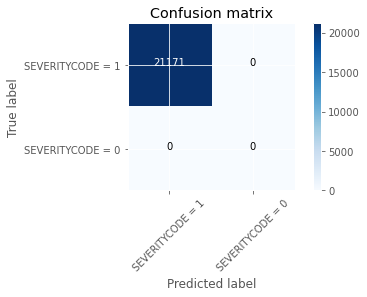

In [54]:
from sklearn.metrics import classification_report, confusion_matrix
import itertools
cm = confusion_matrix(y_test, y_hat, labels = [1,0])
np.set_printoptions(precision = 2)
plt.figure()
plot_confusion_matrix(cm, classes = ['SEVERITYCODE = 1', 'SEVERITYCODE = 0'], normalize = False, title = 'Confusion matrix')
print('F-score report: ', classification_report(y_test, y_hat))


##### log loss

In [88]:
from sklearn.metrics import f1_score
logistic_f1_score = f1_score(y_test, yhat_logistic, average='weighted')
logistic_f1_score

0.5667708136152132

In [55]:
from sklearn.metrics import log_loss

In [56]:
print('Log loss: ', log_loss(y_test, yhat_logistic_prob))

Log loss:  0.6122661543031293


### Decision tree

In [57]:
from sklearn.tree import DecisionTreeClassifier

In [89]:
ks = 32
mean_acc_tree = np.zeros((ks-1))

for n in range(1,ks):
    
    severity_tree = DecisionTreeClassifier(criterion = 'entropy', max_depth = n).fit(x_train, y_train)
    yhat_tree = severity_tree.predict(x_test)
    mean_acc_tree[n-1] = metrics.accuracy_score(y_test, yhat_tree)
    
print(mean_acc_tree)
print( "The best accuracy was with", mean_acc_tree.max(), "with k=", mean_acc_tree.argmax()+1) 

[0.67 0.67 0.67 0.67 0.67 0.67 0.67 0.67 0.67 0.67 0.67 0.67 0.67 0.67
 0.67 0.67 0.67 0.67 0.67 0.67 0.67 0.67 0.67 0.67 0.67 0.67 0.67 0.67
 0.67 0.67 0.67]
The best accuracy was with 0.6723391550977758 with k= 7


In [81]:
severity_tree = DecisionTreeClassifier(criterion = 'entropy', max_depth = 7).fit(x_train, y_train)
yhat_tree = severity_tree.predict(x_test)

In [82]:
from sklearn import metrics
import matplotlib.pyplot as plt
print("Decision Tree's accuracy: ", metrics.accuracy_score(y_test, yhat_tree))

Decision Tree's accuracy:  0.6723391550977758


In [84]:
from sklearn.metrics import jaccard_score
tree_jaccard = jaccard_score(y_test, yhat_tree)
tree_jaccard

0.671249700455308

In [87]:
from sklearn.metrics import f1_score
tree_f1_score = f1_score(y_test, yhat_tree, average='weighted')
tree_f1_score

0.5462294033459135

### SVM

In [ ]:
from sklearn import svm
severity = svm.SVC(kernel = 'rbf').fit(x_train, y_train)
yhat_svm = severity.predict(s_test)

C:\Users\Bryan\anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
